# Project: Exploratory Data Analysis on NYC Yellow Taxi



We will analyze the yellow taxi trip records in NYC. 

##### Data source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

##### Data Dictionary: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf



---



# Asking Questions
Based on dataset, we are interested to know:

Q1: Which days have the highest taxi usage?

Q2: Which hours of the day typically have a high taxi usage?

Q3: Which is the most popular Vendor?

Q4: Which is the preferred payment method?

Q5: What is the average passenger count in a taxi?

Q6: What is the trend between Fare amount and the distance covered by taxis?

Q7: What is the trend between Tip amount and the distance covered by taxis? Does more distance covered result in more tip?

Q8: Which days cover the most distance by taxis?

Q9: What is the average tip by Time of Day?

Q10: What is the average Fare amount by Time of Day?







---



# Preparing the Environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import ipywidgets as widgets
from IPython.display import display, Javascript

In [2]:
df = pd.read_csv('yellow_tripdata.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)




---



# Data Exploration
Let's have a look at the data.

In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2022-08-01 00:17:39,2022-08-01 00:19:58,1.0,0.4,1.0,N,114,148,1,3.5,3.0,0.5,1.80,0.00,0.3,9.10,2.5,0.0
1,1,1,2022-08-01 00:26:06,2022-08-01 00:31:55,1.0,1.4,1.0,N,79,137,1,6.5,3.0,0.5,2.05,0.00,0.3,12.35,2.5,0.0
2,2,1,2022-08-01 00:45:49,2022-08-01 00:59:29,1.0,5.2,1.0,N,79,74,1,16.0,3.0,0.5,3.95,0.00,0.3,23.75,2.5,0.0
3,3,1,2022-08-01 00:05:49,2022-08-01 00:25:42,1.0,9.4,1.0,N,138,113,1,28.0,3.0,0.5,7.65,6.55,0.3,46.00,2.5,0.0
4,4,1,2022-08-01 00:36:29,2022-08-01 00:51:29,1.0,1.7,1.0,N,137,68,1,11.0,3.0,0.5,1.00,0.00,0.3,15.80,2.5,0.0


In [4]:
df.shape

(3152677, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152677 entries, 0 to 3152676
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
dtypes: float64(12), int64(5), object(3)
memory usage: 481.1+ MB




---



# Data Cleaning and Manipulation
Before we start with analysis, we must first clean the data or "scrub the dirt".

* Treat the nulls
* Drop unneeded columns
* Split columns
* Remove outliers and invalid data
* Fixing data types

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-08-01 00:17:39,2022-08-01 00:19:58,1.0,0.4,1.0,N,114,148,1,3.5,3.0,0.5,1.80,0.00,0.3,9.10,2.5,0.0
1,1,2022-08-01 00:26:06,2022-08-01 00:31:55,1.0,1.4,1.0,N,79,137,1,6.5,3.0,0.5,2.05,0.00,0.3,12.35,2.5,0.0
2,1,2022-08-01 00:45:49,2022-08-01 00:59:29,1.0,5.2,1.0,N,79,74,1,16.0,3.0,0.5,3.95,0.00,0.3,23.75,2.5,0.0
3,1,2022-08-01 00:05:49,2022-08-01 00:25:42,1.0,9.4,1.0,N,138,113,1,28.0,3.0,0.5,7.65,6.55,0.3,46.00,2.5,0.0
4,1,2022-08-01 00:36:29,2022-08-01 00:51:29,1.0,1.7,1.0,N,137,68,1,11.0,3.0,0.5,1.00,0.00,0.3,15.80,2.5,0.0


In [8]:
# Converting pickup and dropoff columns from object to datetime

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
# To check the missing values 

df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          93174
trip_distance                0
RatecodeID               93174
store_and_fwd_flag       93174
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     93174
airport_fee              93174
dtype: int64

In [11]:
# Dropping data where fare amount and tip amount is less than 0 and trip distance is 0

drops = df[(df["fare_amount"] <= 0) | (df["tip_amount"] <= 0) | (df["trip_distance"] == 0) ]
df = df[ ~df.index.isin(drops.index) ].copy()
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-08-01 00:17:39,2022-08-01 00:19:58,1.0,0.40,1.0,N,114,148,1,3.50,3.0,0.5,1.80,0.00,0.3,9.10,2.5,0.0
1,1,2022-08-01 00:26:06,2022-08-01 00:31:55,1.0,1.40,1.0,N,79,137,1,6.50,3.0,0.5,2.05,0.00,0.3,12.35,2.5,0.0
2,1,2022-08-01 00:45:49,2022-08-01 00:59:29,1.0,5.20,1.0,N,79,74,1,16.00,3.0,0.5,3.95,0.00,0.3,23.75,2.5,0.0
3,1,2022-08-01 00:05:49,2022-08-01 00:25:42,1.0,9.40,1.0,N,138,113,1,28.00,3.0,0.5,7.65,6.55,0.3,46.00,2.5,0.0
4,1,2022-08-01 00:36:29,2022-08-01 00:51:29,1.0,1.70,1.0,N,137,68,1,11.00,3.0,0.5,1.00,0.00,0.3,15.80,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152670,2,2022-08-31 23:11:28,2022-08-31 23:25:26,NaN,2.48,NaN,NaN,186,234,0,10.30,0.0,0.5,10.00,0.00,0.3,23.60,NaN,NaN
3152671,1,2022-08-31 23:46:16,2022-08-31 23:50:42,NaN,0.90,NaN,NaN,234,48,0,5.50,0.5,0.5,1.40,0.00,0.3,10.70,NaN,NaN
3152673,1,2022-08-31 23:11:41,2022-08-31 23:21:23,NaN,2.10,NaN,NaN,48,238,0,8.00,0.5,0.5,1.77,0.00,0.3,13.57,NaN,NaN
3152674,2,2022-08-31 23:02:53,2022-08-31 23:12:13,NaN,1.00,NaN,NaN,230,48,0,10.25,0.0,0.5,3.18,0.00,0.3,16.73,NaN,NaN


In [12]:
# Creating columns for pickup date and pickup time from the datetime format, same for dropoff 

df['pickup_date'] =  [d.date() for d in df['tpep_pickup_datetime']]
df['pickup_time'] =  [d.time() for d in df['tpep_pickup_datetime']]
df['dropoff_date'] = [d.date() for d in df['tpep_dropoff_datetime']]
df['dropoff_time'] = [d.time() for d in df['tpep_dropoff_datetime']]

In [13]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
pickup_date                      object
pickup_time                      object
dropoff_date                     object
dropoff_time                     object
dtype: object

In [14]:
# Converting pickup date and dropoff date into datetime format

df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])

In [15]:
# Converting columns to datetime

df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [16]:
# Creating columns for day, weekday, hour and month for pickup and dropoff

df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()
df['pickup_weekday']=df['tpep_pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['tpep_dropoff_datetime'].dt.weekday
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour
df['pickup_month']=df['tpep_pickup_datetime'].dt.month
df['dropoff_month']=df['tpep_dropoff_datetime'].dt.month

# Descriptive Statistics

In [17]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_month,dropoff_month
count,2.309985e+06,2.232205e+06,2.309985e+06,2.232205e+06,2.309985e+06,2.309985e+06,2.309985e+06,2.309985e+06,2.309985e+06,2.309985e+06,...,2.309985e+06,2.309985e+06,2.232205e+06,2.232205e+06,2.309985e+06,2.309985e+06,2.309985e+06,2.309985e+06,2.309985e+06,2.309985e+06
mean,1.726558e+00,1.404129e+00,6.103133e+00,1.067550e+00,1.645244e+02,1.623288e+02,9.663864e-01,1.461149e+01,1.012853e+00,4.966731e-01,...,2.999843e-01,2.237995e+01,2.358960e+00,1.007885e-01,2.772498e+00,2.776533e+00,1.428795e+01,1.432114e+01,8.000008e+00,8.000280e+00
std,4.457611e-01,9.677708e-01,6.093275e+02,3.623559e-01,6.444729e+01,6.951130e+01,1.805589e-01,1.315459e+01,1.236544e+00,4.113835e-02,...,2.171191e-03,1.734395e+01,5.768094e-01,3.403339e-01,1.933597e+00,1.935680e+00,5.805053e+00,5.914952e+00,7.385511e-03,2.077321e-02
min,1.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,...,0.000000e+00,1.620000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.200000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,...,3.000000e-01,1.295000e+01,2.500000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.100000e+01,8.000000e+00,8.000000e+00
50%,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,...,3.000000e-01,1.655000e+01,2.500000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.500000e+01,1.500000e+01,8.000000e+00,8.000000e+00
75%,2.000000e+00,1.000000e+00,3.700000e+00,1.000000e+00,2.330000e+02,2.330000e+02,1.000000e+00,1.600000e+01,2.500000e+00,5.000000e-01,...,3.000000e-01,2.330000e+01,2.500000e+00,0.000000e+00,4.000000e+00,4.000000e+00,1.900000e+01,1.900000e+01,8.000000e+00,8.000000e+00
max,5.000000e+00,9.000000e+00,3.305787e+05,9.900000e+01,2.650000e+02,2.650000e+02,3.000000e+00,6.000000e+02,8.250000e+00,3.300000e+00,...,3.000000e-01,6.503000e+02,2.750000e+00,1.250000e+00,6.000000e+00,6.000000e+00,2.300000e+01,2.300000e+01,1.200000e+01,9.000000e+00




---



# Exploratory Data Analysis

## Q1: Which days have the highest taxi usage?


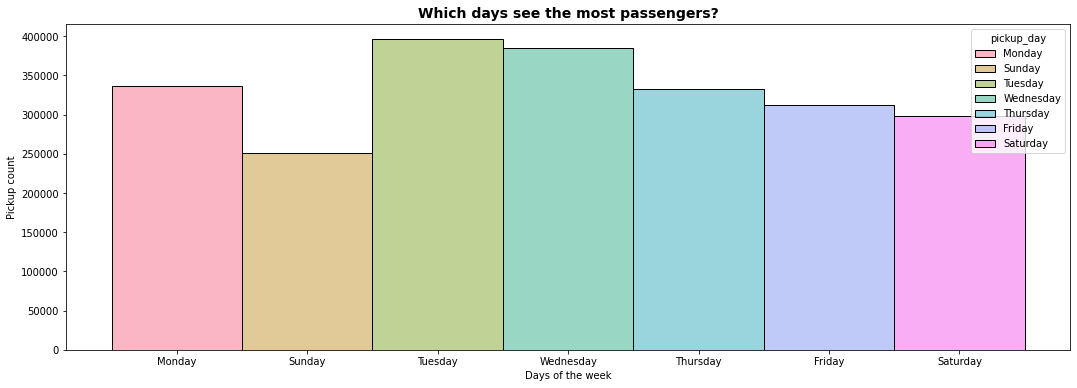

In [18]:
# Trip count vs Days of week

plt.figure(figsize=(18,6))
sns.histplot(data=df, x='pickup_day', hue='pickup_day', palette="husl")
plt.title("Which days see the most passengers?", fontweight="bold", fontsize=14)
plt.xlabel('Days of the week')
plt.ylabel('Pickup count')
plt.show()

We observe that

* Tuesdays and Wednesdays are the busiest days of the week. 

* Taxis are used the least on Sundays.


## Q2: Which hours of the day typically have a high taxi usage?


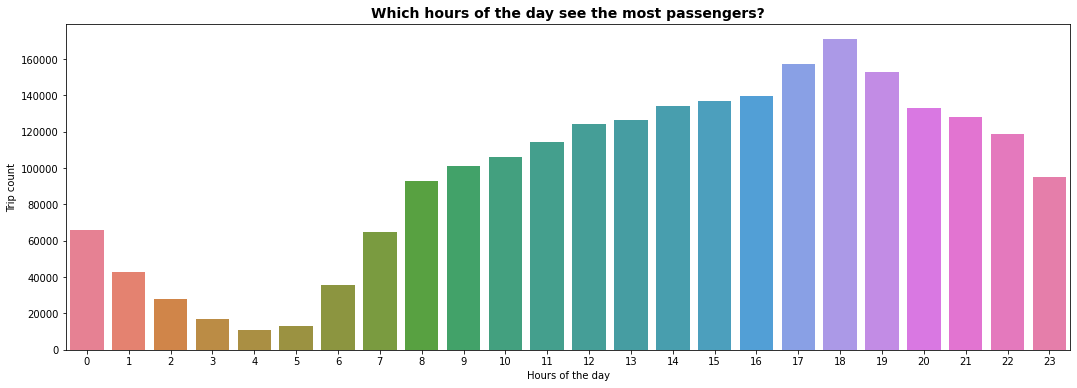

In [19]:
# Trip count vs Hours of the day

plt.figure(figsize=(18,6))
sns.countplot(data=df, x='pickup_hour', palette="husl")
plt.title("Which hours of the day see the most passengers?", fontweight="bold", fontsize=14)
plt.xlabel('Hours of the day')
plt.ylabel('Trip count')
plt.show()

We observe that

* Taxi usage is typically high during Morning hours from 10am to 9pm - probably because of office hours.

In [20]:
data = df.copy()
data['pickup_date'] = data['pickup_date'].dt.date

In [21]:
data_group = data.groupby('pickup_date').count()

In [22]:
data_group = data_group.reset_index()

In [23]:
# Trip count vs Hours of the day according to a particular Date

dates = list(data['pickup_date'].unique())
@widgets.interact(Date = dates)
def f(Date):      
    datax = data[(data['pickup_date']==Date)]
    plt.figure(figsize=(18,6))
    sns.countplot(data=datax, x='pickup_hour', palette="husl")
    plt.title("Which hours of the day see the most customers according to a particular date", fontweight="bold", fontsize=14)
    plt.xlabel('Hours of the day')
    plt.ylabel('Pickup count')
    plt.show()

interactive(children=(Dropdown(description='Date', options=(datetime.date(2022, 8, 1), datetime.date(2022, 7, …

## Q3: Which is the most popular Vendor?


#### Vendors according to the Data dictionary

1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.

In [24]:
# What are the different Vendors available?

df.VendorID.unique()

array([1, 2, 5])

In [25]:
#Removing 5, 6 - they don't mean anything according to data dictionary
df.drop(df[df['VendorID'] == 6].index, inplace = True)
df.drop(df[df['VendorID'] == 5].index, inplace = True)

print(df.VendorID.unique())

[1 2]


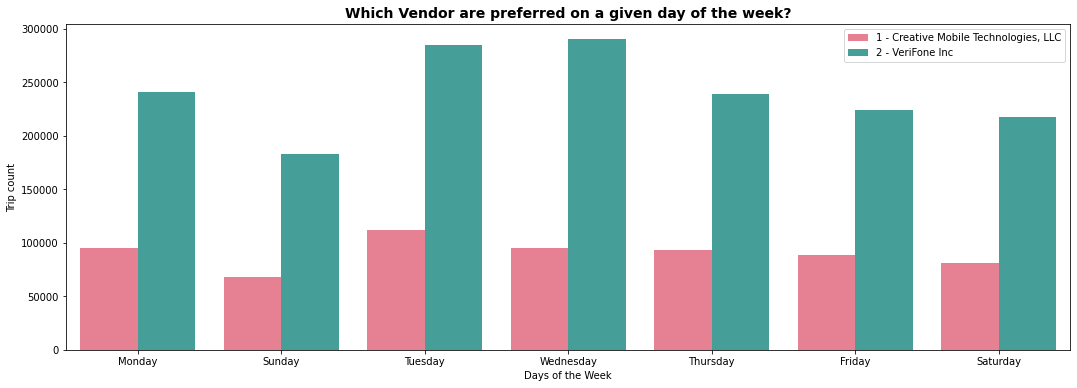

In [26]:
# Vendors vs Days

plt.figure(figsize=(18,6))
sns.countplot(data=df, x='pickup_day', hue='VendorID', palette="husl")
plt.title("Which Vendor are preferred on a given day of the week?", fontweight="bold", fontsize=14)
plt.xlabel('Days of the Week')
plt.ylabel('Trip count')
plt.legend(["1 - Creative Mobile Technologies, LLC", "2 - VeriFone Inc"])
plt.show()

We observe that

* On most days, Vendor 2 - VeriFone Inc is more popular on all days.

In [27]:
# Vendors acc to a particular Date

data.drop(data[data['VendorID'] == 6].index, inplace = True)
data.drop(data[data['VendorID'] == 5].index, inplace = True)

dates = list(data['pickup_date'].unique())
@widgets.interact(Date = dates)
def f(Date):      
    datax = data[(data['pickup_date']==Date)]
    plt.figure(figsize=(18,6))
    sns.countplot(data=datax, x='VendorID', palette="husl")
    plt.title("Prefered Vendor according to a particular date", fontweight="bold", fontsize=14)
    plt.xlabel('Different Vendors')
    plt.ylabel('Pickup count')
    plt.show()

interactive(children=(Dropdown(description='Date', options=(datetime.date(2022, 8, 1), datetime.date(2022, 7, …

## Q4: Which is the preferred payment method?


#### Payment Methods according to the Data dictionary
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

In [28]:
# What are the different payment methods available?

df.payment_type.unique()

array([1, 2, 3, 0])

In [29]:
#Removing 0 as it does not mean anything according to data dictionary
df.drop(df[df['payment_type'] == 0].index, inplace = True)

print(df.payment_type.unique())

[1 2 3]


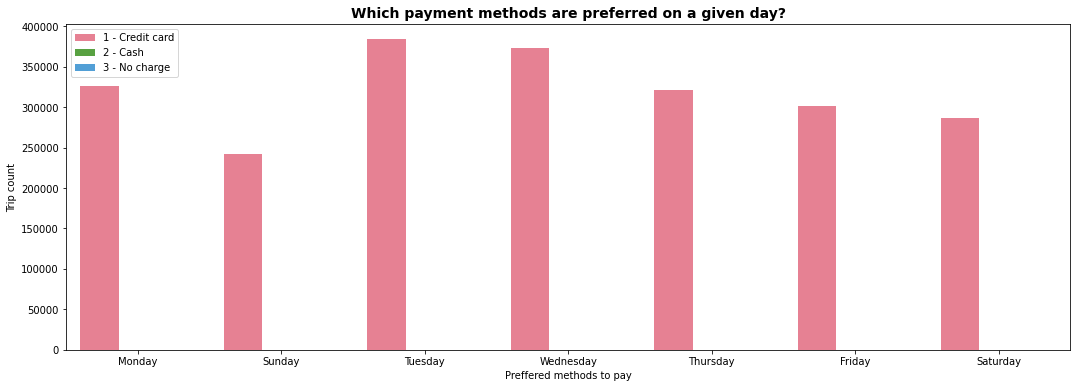

In [30]:
# Payment method vs Days

plt.figure(figsize=(18,6))
sns.countplot(data=df, x='pickup_day', hue='payment_type', palette='husl')
plt.title("Which payment methods are preferred on a given day?", fontweight="bold", fontsize=14)
plt.xlabel('Preffered methods to pay')
plt.ylabel('Trip count')
plt.legend(title='Payment Method')
plt.legend(['1 - Credit card','2 - Cash','3 - No charge','4 - Dispute'])

plt.show()

We observe that

* Payment method 1 - Credit Card is preferred, followed by method 2 - Cash.

## Q5: What is the average passenger count in a taxi?


In [31]:
# Number of Passengers

df.passenger_count.unique()

array([1., 0., 2., 5., 3., 4., 6., 8., 7., 9.])

In [32]:
# Converting float to int

df['passenger_count'] = df['passenger_count'].fillna(0).astype(int)
df.passenger_count.unique()

array([1, 0, 2, 5, 3, 4, 6, 8, 7, 9])

In [33]:
# Removing the outliers that make no sense

df.drop(df[df['passenger_count'] == 0].index, inplace = True)
df.drop(df[df['passenger_count'] == 7].index, inplace = True)
df.drop(df[df['passenger_count'] == 8].index, inplace = True)
df.drop(df[df['passenger_count'] == 9].index, inplace = True)
df.passenger_count.unique()

array([1, 2, 5, 3, 4, 6])

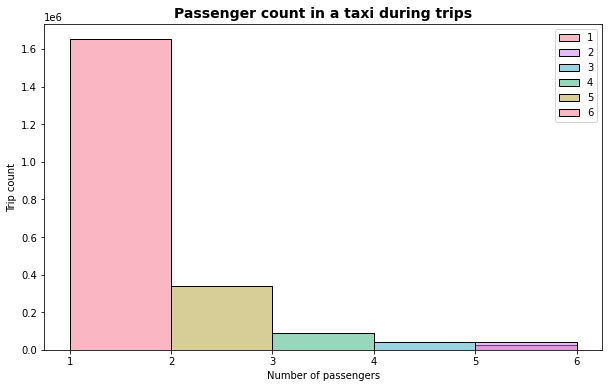

In [34]:
# Passenger count

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='passenger_count', hue='passenger_count', palette='husl', bins = 5)
plt.title("Passenger count in a taxi during trips", fontweight="bold", fontsize=14)
plt.xlabel('Number of passengers')
plt.ylabel('Trip count')
plt.legend(['1','2','3','4','5','6'])


plt.show()

We observe that

* Most taxi serve 1 passenger.

* Taxis serve 4-6 passengers on rare occasions.


## Q6: What is the trend between Fare amount and the distance covered by taxis?


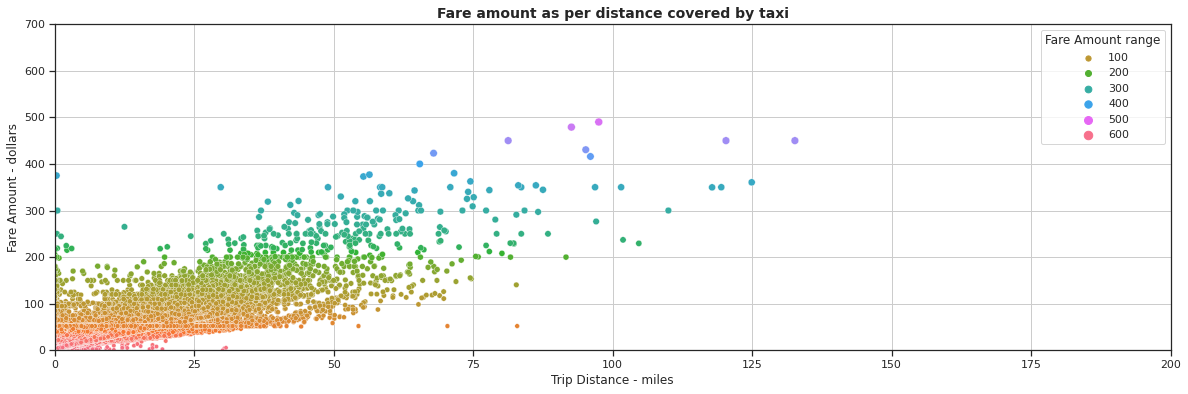

In [35]:
# Fare amount vs Trip Distance

plt.figure(figsize=(20,6))
sns.set(style="ticks")
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='fare_amount', size = 'fare_amount', palette='husl')


plt.xlim(0, 200)
plt.ylim(0, 700)
plt.title('Fare amount as per distance covered by taxi', fontweight="bold", fontsize=14)
plt.xlabel('Trip Distance - miles')
plt.ylabel('Fare Amount - dollars')
plt.legend(title='Fare Amount range')
plt.grid()


plt.show()

We observe that

* Fare amount and trip distance are positively correlated, as expected.

## Q7: What is the trend between Tip amount and the distance covered by taxis? Does more distance covered result in more tip?


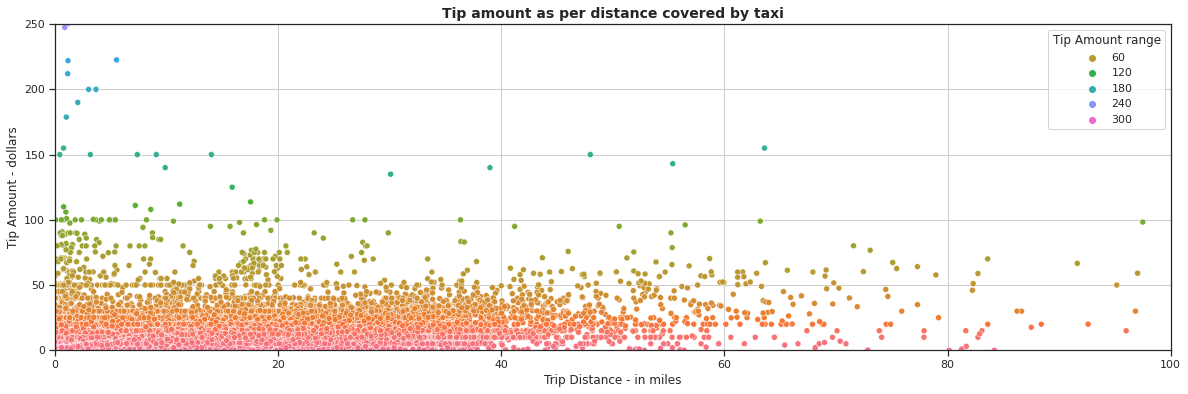

In [36]:
# Tip amount vs Trip Distance

plt.figure(figsize=(20,6))
sns.set(style="ticks")
sns.scatterplot(data=df, x='trip_distance', y='tip_amount', hue='tip_amount', palette='husl')


plt.xlim(0, 100)
plt.ylim(0, 250)
plt.title('Tip amount as per distance covered by taxi', fontweight="bold", fontsize=14)
plt.xlabel('Trip Distance - in miles')
plt.ylabel('Tip Amount - dollars')
plt.legend(title='Tip Amount range')
plt.grid()

plt.show()

We observe that
* While we usually see that there is a relation between the tip and the fare in other services. That is not the case when it comes to Taxi service. People stick to a bare minimum tip regardless of the distance covered by taxis.

## Q8: Which days cover the most distance by taxis?

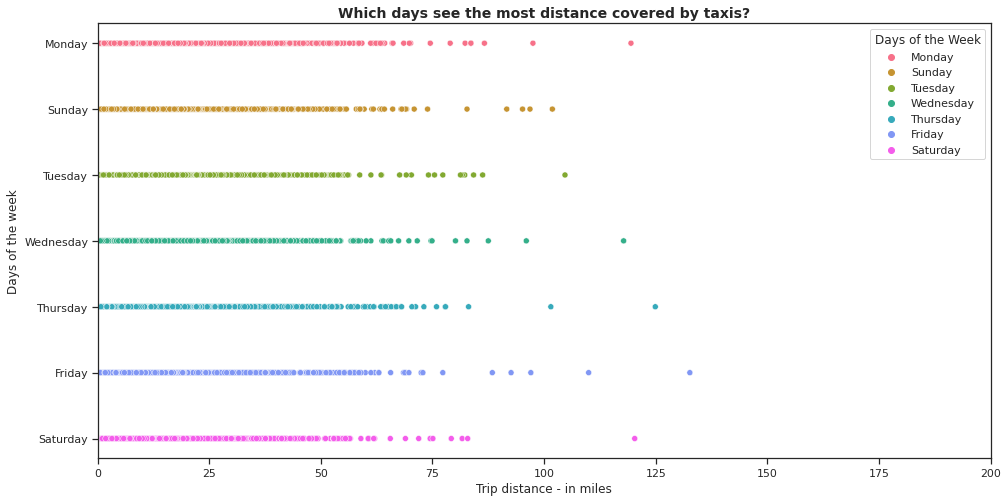

In [39]:
# Trip Distance vs Day
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x="trip_distance", y="pickup_day", hue="pickup_day", palette="husl")
plt.xlim(0,200)

plt.title("Which days see the most distance covered by taxis?", fontweight="bold", fontsize=14)
plt.xlabel('Trip distance - in miles')
plt.ylabel('Days of the week')
plt.legend(title = "Days of the Week")

plt.show()

We observe that

* Taxi usage is typically highest on weekdays.

* Saturday and Sundays have the least taxi usage - probably because the office remains closed during the weekend.

## Q9: What is the average tip by Time of Day?


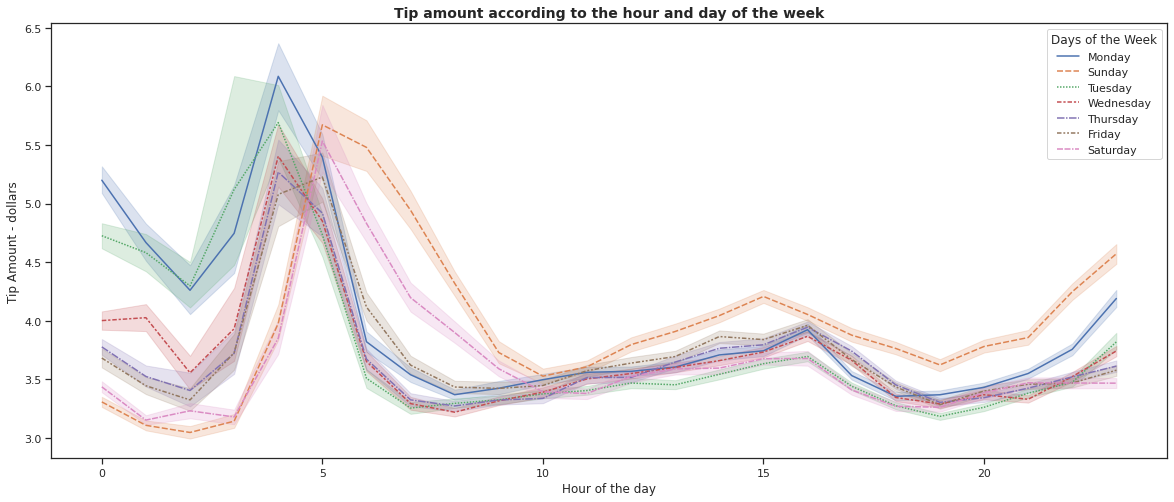

In [40]:
# Tip acc time and day

plt.figure(figsize=(20,8))
sns.lineplot(data=data, x="pickup_hour", y="tip_amount", hue="pickup_day", style="pickup_day")


plt.title("Tip amount according to the hour and day of the week",fontweight="bold", fontsize=14)
plt.xlabel('Hour of the day')
plt.ylabel('Tip Amount - dollars')
plt.legend(title = "Days of the Week")

plt.show()

We observe that

* Higher tips are given after midnight especially at 12-1 am and 4-6am, typically above $3.25.

## Q10: What is the average Fare amount by Time of Day?


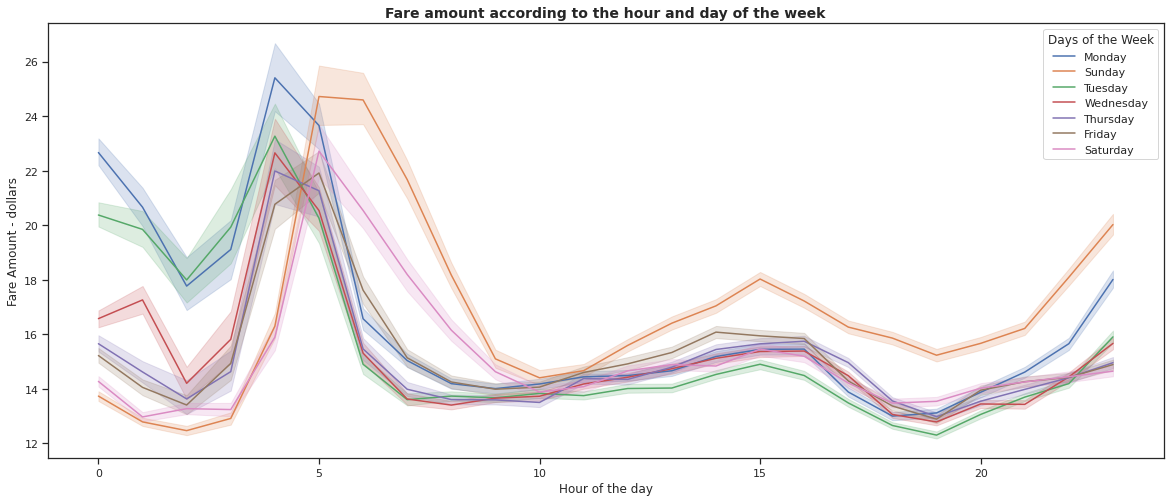

In [41]:
# Fare acc time and day

plt.figure(figsize=(20,8))
sns.lineplot(data=data, x="pickup_hour", y="fare_amount", hue="pickup_day")

plt.title("Fare amount according to the hour and day of the week", fontweight="bold", fontsize=14)
plt.xlabel('Hour of the day')
plt.ylabel('Fare Amount - dollars')
plt.legend(title = "Days of the Week")
plt.show()

We observe that

* Fares are higher after midnight on all days, typically more than $18.

# Other Fares
There are some extra charges on top of the fare amount, such as - mta tax, tolls amount, airport fee, improvement_surcharge etc.

In [42]:
# Other fares acc to day of the Week

criteria_rb = widgets.RadioButtons(
    options=['extra', 'mta_tax', 'tolls_amount', 'airport_fee','improvement_surcharge'],
    description='Other fares:',
    disabled=False)


def plot_extra(criteria):
    plt.figure(figsize=(12, 6))
    sns.barplot(x= 'pickup_day', y=criteria, data=data, palette="husl")
    plt.title("Other fares that are charged across the week", fontweight="bold", fontsize=14)
    plt.xlabel("Week")
    plt.ylabel("Charges - dollars")
    plt.show()

widgets.interact(plot_extra, criteria = criteria_rb)

plt.show()

interactive(children=(RadioButtons(description='Other fares:', options=('extra', 'mta_tax', 'tolls_amount', 'a…



---



# Conclusion

Let us revisit the questions at the beginning of the analysis and summarize our conclusion.


### 1. Which days have the highest taxi usage?

Tuesdays and Wednesdays are the busiest days of the week.

### 2. Which hours of the day typically have a high taxi usage?

Taxi usage is typically high during Morning hours from 10am to 9pm - probably because of office hours.

### 3. Which is the most popular Vendor?

Vendor 2 - VeriFone Inc is more popular

### 4. Which is the preferred payment method?

Credit Card is preferred, followed by Cash.

### 5. What is the average passenger count in a taxi?

Most taxi serve 1 passenger.

### 6. What is the trend between Fare amount and the distance covered by taxis?

Fare amount and trip distance are positively correlated

### 7. What is the trend between Tip amount and the distance covered by taxis? Does more distance covered result in more tip?

People stick to a bare minimum tip regardless of the distance covered by taxis.

###8. Which days cover the most distance by taxis?

Taxi usage is typically highest on weekdays.

###9. What is the average tip by Time of Day?

Higher tips are given after midnight especially at 12-1 am and 4-6am, typically above $3.25

###10. What is the average Fare amount by Time of Day?

Fares are higher after midnight on all days, typically more than $18.